**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
TXT_FNAME_INP = "region.summary.genome_tss_pol2.tsv"

**View files**

In [4]:
txt_fdiry = file.path(FD_RES, "region_closest", "*", "summary")
txt_fname = "region.summary.*.tsv"
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_closest/fcc_astarr_macs_input_overlap/summary/region.summary.genome_tss_pol2_rnaseq.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_closest/fcc_astarr_macs_input_overlap/summary/region.summary.genome_tss_pol2.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_closest/fcc_astarr_macs_input_union/summary/region.summary.genome_tss_pol2_rnaseq.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_closest/fcc_astarr_macs_input_union/summary/region.summary.genome_tss_pol2.tsv 


## Import data

In [5]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_closest", txt_folder, "summary")
    txt_fname = TXT_FNAME_INP
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 153357     11

$fcc_astarr_macs_input_union
[1] 250787     11



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Region_TSS,Score_Pol2,Gene,Distance2TSS,TSS_Proximity
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,1469,Proximal
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,2409,Distal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:17436-17437,9.43812,MIR6859-1,1099,Proximal


## Arrange table

In [6]:
lst = lst_dat_region_annot_import 
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::mutate(
        Distance = Distance2TSS,
        Label    = TSS_Proximity
    )
    return(dat)
})

### assign and show
lst_dat_region_annot_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 153357     13

$fcc_astarr_macs_input_union
[1] 250787     13



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Region_TSS,Score_Pol2,Gene,Distance2TSS,TSS_Proximity,Distance,Label
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,1469,Proximal,1469,Proximal
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,2409,Distal,2409,Distal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:17436-17437,9.43812,MIR6859-1,1099,Proximal,1099,Proximal


## Explore data

### Distribution of distance

**Check missing values**

In [7]:
lst = lst_dat_region_annot_arrange
lst = lapply(lst, function(dat){
    vec = dat$Distance
    num = sum(is.na(vec))
    return(num)
})
print(lst)

$fcc_astarr_macs_input_overlap
[1] 0

$fcc_astarr_macs_input_union
[1] 0



**Check region uniqueness**

In [8]:
lst = lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]

print(dim(dat))
print(length(dat$Region))
print(length(unique(dat$Region)))
head(dat)

[1] 153357     13
[1] 153357
[1] 150042


Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Region_TSS,Score_Pol2,Gene,Distance2TSS,TSS_Proximity,Distance,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,1469,Proximal,1469,Proximal
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:11873-11874,0.00023,DDX11L1,2409,Distal,2409,Distal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:17436-17437,9.43812,MIR6859-1,1099,Proximal,1099,Proximal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:17436-17437,9.43812,MIR6859-2,1099,Proximal,1099,Proximal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:17436-17437,9.43812,MIR6859-3,1099,Proximal,1099,Proximal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2,chr1:17436-17437,9.43812,MIR6859-4,1099,Proximal,1099,Proximal


**Helper function to get the mode of a continuous variable**

In [9]:
fun_get_mode_continuous <- function(x, ...) {
    obj = density(x, ...)
    num = obj$x[which.max(obj$y)]
    return(num)
}

**Summary distance information**

In [10]:
### init
lst = lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Distance = Distance / 1000)

### Count of labels
cat("Label: TSS proximity", "\n")
res = table(dat$Label)
print(res)
cat("\n")

### Mode of distance
cat("Mode of Distance:", "\n")
vec = dat$Distance
num = fun_get_mode_continuous(vec)
cat("Mode =", num, "kb", "\n")
cat("\n")


### Count of distance
cat("Count of Distance:", "\n")
vec = dat$Distance
cat("Count (D==0) =", sum(vec == 0), "\n")
cat("Count (D<=2) =", sum(vec <= 2), "\n")
cat("\n")

### Summary for non-zero distance
cat("Summary of Distance > 0:", "\n")
tmp = dat %>% dplyr::filter(Distance > 0)
vec = tmp$Distance
res = summary(vec)
print(res)
cat("\n")

Label: TSS proximity 

  Distal Proximal 
  130280    23077 

Mode of Distance: 
Mode = 4.452467 kb 

Count of Distance: 
Count (D==0) = 16143 
Count (D<=2) = 23077 

Summary of Distance > 0: 
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   0.001   10.760   25.990   50.543   58.812 2186.727 



**Plot distance distribution**

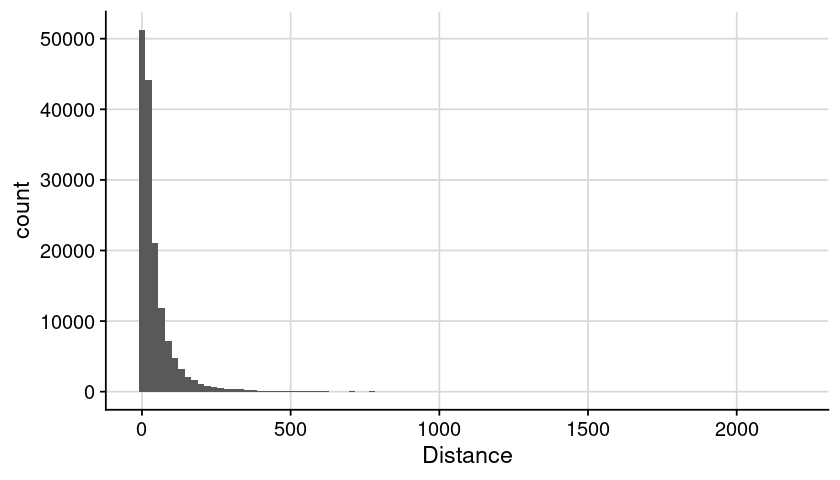

In [11]:
lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Distance = Distance / 1000)

gpt = ggplot(dat, aes(x=Distance)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid()

options(repr.plot.height = 4, repr.plot.width = 7) 
print(gpt)

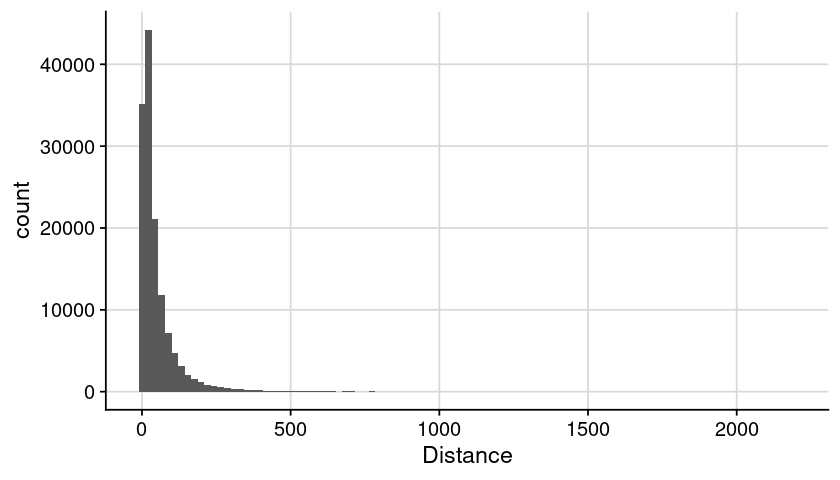

In [12]:
lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Distance = Distance / 1000)
dat = dat %>% dplyr::filter(Distance > 0)

gpt = ggplot(dat, aes(x=Distance)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid()

options(repr.plot.height = 4, repr.plot.width = 7) 
print(gpt)

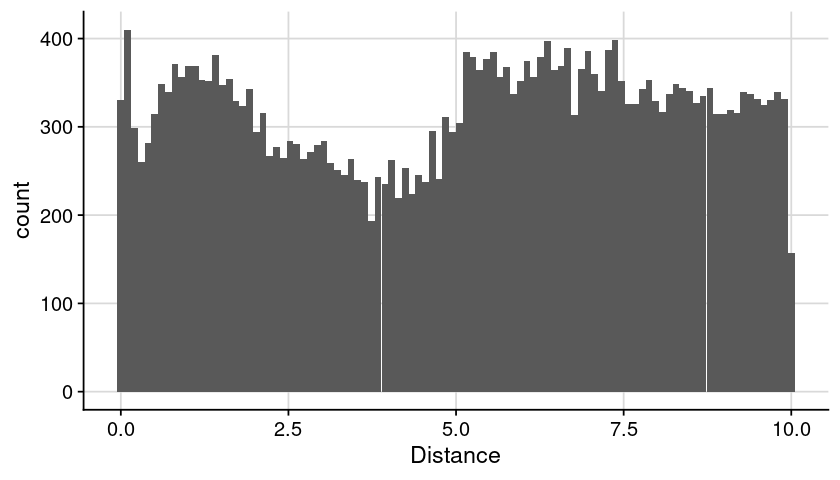

In [13]:
lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Distance = Distance / 1000)

dat = dat %>% dplyr::filter(Distance > 0, Distance < 10)
gpt = ggplot(dat, aes(x=Distance)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid()

options(repr.plot.height = 4, repr.plot.width = 7) 
print(gpt)

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_bar()`).”


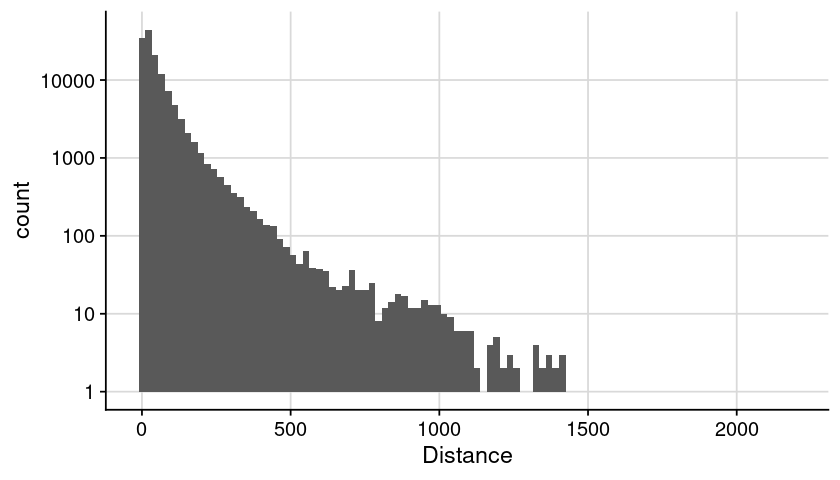

In [14]:
lst = lst_dat_region_annot_arrange
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Distance = Distance / 1000)

dat = dat %>% dplyr::filter(Distance > 0)
gpt = ggplot(dat, aes(x=Distance)) +
     geom_histogram(bins=100) +
     theme_cowplot() +
     background_grid() +
     scale_y_log10()

options(repr.plot.height = 4, repr.plot.width = 7) 
print(gpt)

## Save figures

**Helper function for region label**

In [15]:
fun_str_map_label = function(vec_txt_input){
    vec_txt_pattern = c("overlap", "union")
    vec_txt_replace = c("ATAC (Overlap)", "ATAC (Union)")
    vec_txt_output  = fun_str_map_detect(
        vec_txt_input,
        vec_txt_pattern,
        vec_txt_replace
    )
    return(vec_txt_output)
}

fun_str_map_label("ASTARR_overlap")

[1] "ATAC (Overlap)"

**Set text size**

In [16]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 14)
)

**Plot distribution of distance (0-10kb)**

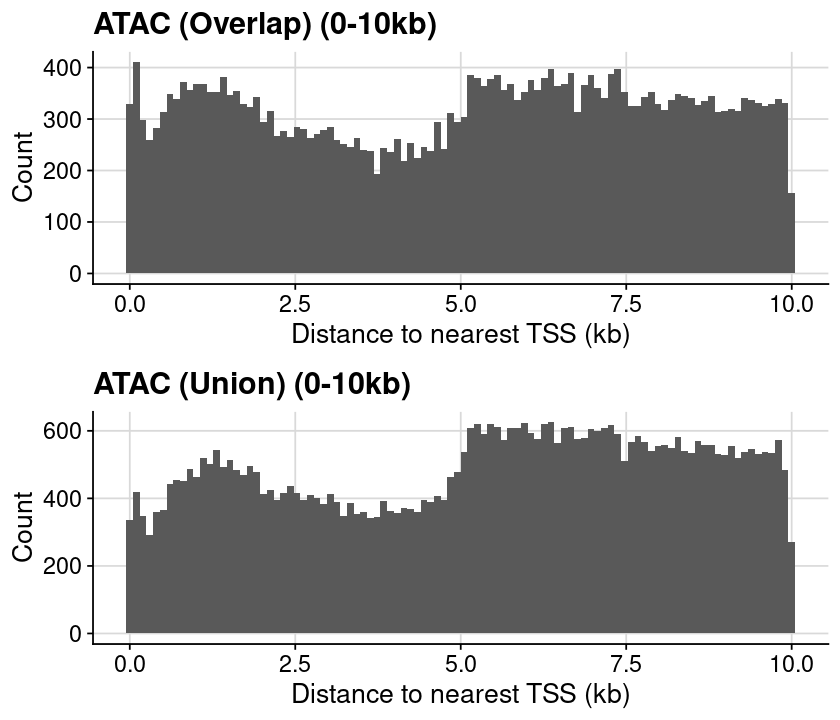

In [17]:
### init
lst = lst_dat_region_annot_arrange
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::mutate(Distance = Distance / 1000)
    return(dat)
})

### loop through each table to plot
lst = lapply(names(lst), function(idx){
    ### get and process data
    dat = lst[[idx]]
    tmp = dat %>% dplyr::filter(Distance > 0, Distance <= 10)

    ### set text
    txt = fun_str_map_label(idx)
    txt = paste(txt, "(0-10kb)")
    txt_title = txt
                
    ### create plot
    gpt = ggplot(tmp, aes(x=Distance)) +
        geom_histogram(bins=100) +
        theme_cowplot() +
        background_grid() +
        theme_text +
        labs(
            x = "Distance to nearest TSS (kb)",
            y = "Count",
            title = txt_title
        )
    return(gpt)
})

### assign plot
lst_gpt_export_subset = lst

### show plot
options(repr.plot.height = 6, repr.plot.width = 7) 
plot_grid(plotlist = lst, ncol=1, align = "v")

**Plot distribution of distance (Total)**

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message in scale_y_log10(breaks = vec_num_breaks, labels = vec_txt_breaks):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message in scale_y_log10(breaks = vec_num_breaks, labels = vec_txt_breaks):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”


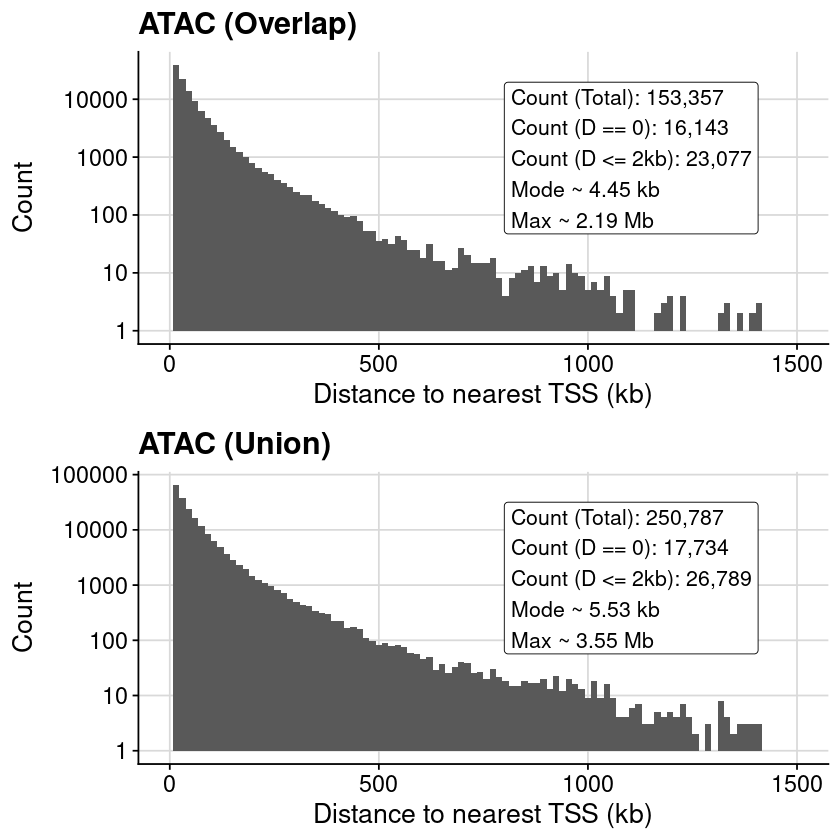

In [22]:
### init
lst = lst_dat_region_annot_arrange
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::mutate(Distance = Distance / 1000)
    return(dat)
})

### loop through each table to plot
lst = lapply(names(lst), function(idx){
    ### get data and process data
    dat = lst[[idx]]
    tmp = dat %>% dplyr::filter(Distance > 0)
    vec = dat$Distance
    
    ### set text
    txt_title = fun_str_map_label(idx)
    txt_line1 = paste("Count (Total):", scales::comma(length(vec)))
    txt_line2 = paste("Count (D == 0):", scales::comma(sum(vec == 0)))
    txt_line3 = paste("Count (D <= 2kb):", scales::comma(sum(vec <= 2)))
    txt_line4 = paste("Mode ~", round(fun_get_mode_continuous(vec), 2), "kb")
    txt_line5 = paste("Max ~",  round(max(vec)/1000, 2), "Mb")
    txt_annot = paste(txt_line1, txt_line2, txt_line3, txt_line4, txt_line5, sep = "\n")
    
    ### create plot
    vec_num_breaks = c(1, 10, 100, 1000, 10000, 100000, 1000000)
    vec_txt_breaks = format(vec_num_breaks, scientific = FALSE)
    gpt = ggplot(tmp, aes(x=Distance)) +
        geom_histogram(bins=100) +
        theme_cowplot() +
        background_grid() +
        theme_text +
        labs(
            x = "Distance to nearest TSS (kb)",
            y = "Count",
            title = txt_title
        ) +
        scale_y_log10(
            breaks = vec_num_breaks,
            labels = vec_txt_breaks
        ) +
        annotate(
            "label", 
            x = 800,
            y = Inf,
            label = txt_annot,
            fill  = "white",
            size  = 4.5,
            hjust = 0,
            vjust = 1.2
        ) +
        xlim(0, 1500)
    return(gpt)
})

### assign plot
lst_gpt_export_total = lst

### show plot
options(repr.plot.height = 7, repr.plot.width = 7) 
plot_grid(plotlist = lst, ncol=1, align = "v")

**Combine plots**

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message in scale_y_log10(breaks = vec_num_breaks, labels = vec_txt_breaks):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message in scale_y_log10(breaks = vec_num_breaks, labels = vec_txt_breaks):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_bar()`).”


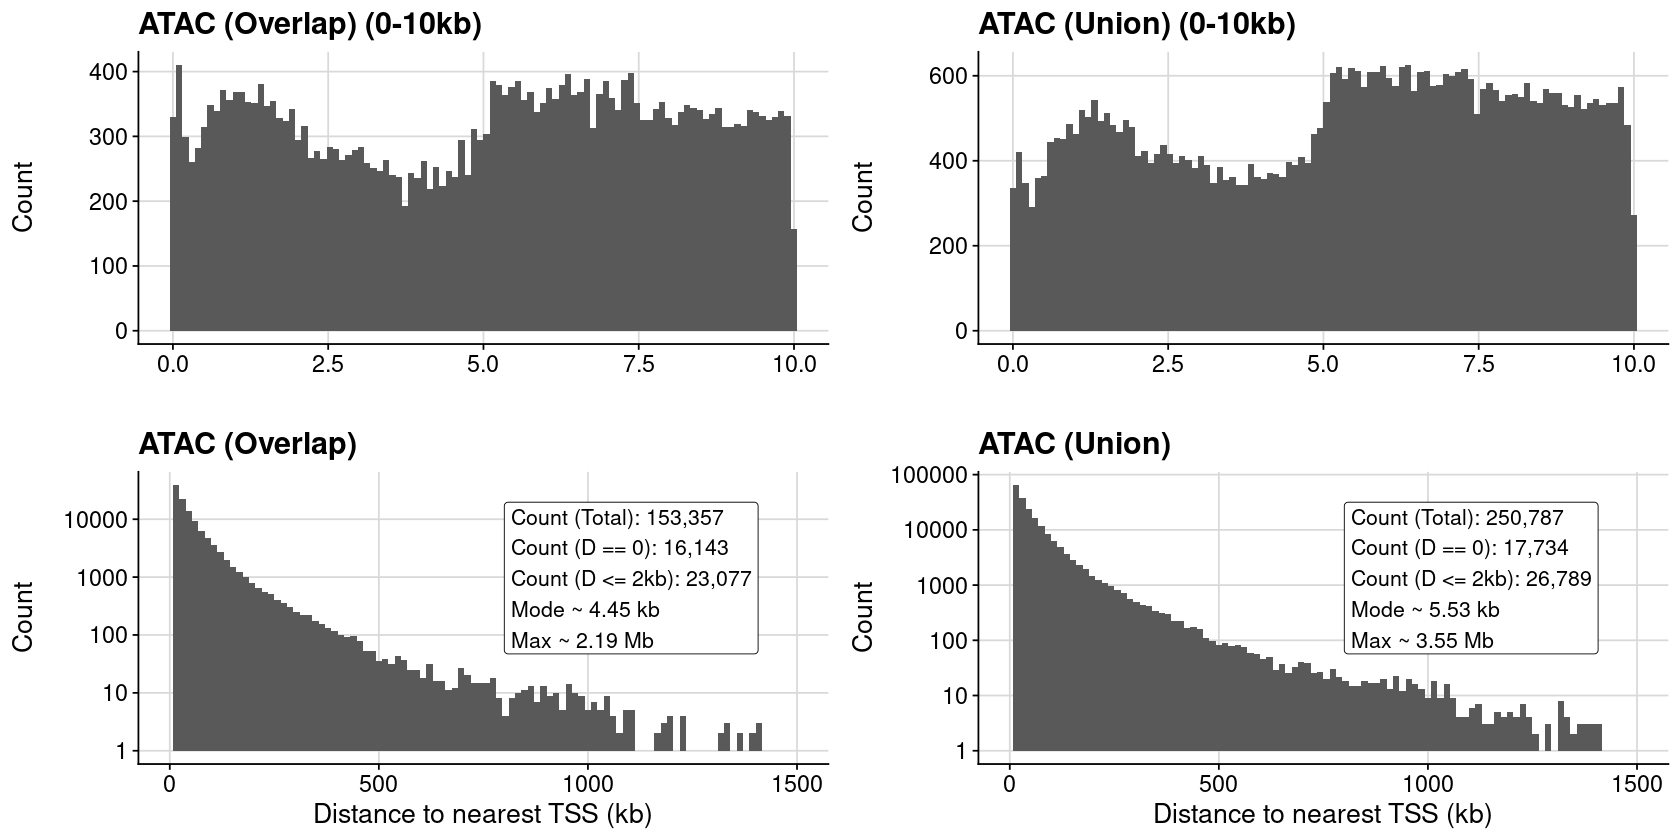

In [23]:
### arrange plots
lst = list(
    lst_gpt_export_subset[[1]] + labs(x=""),
    lst_gpt_export_subset[[2]] + labs(x=""),
    lst_gpt_export_total[[1]], 
    lst_gpt_export_total[[2]]
)
plt = plot_grid(plotlist = lst, ncol=2, align = "v")

### assign plot
plt_export = plt

### show plot
options(repr.plot.height = 7, repr.plot.width = 14) 
print(plt)

**Save plots**

In [24]:
txt_fdiry = "./"
txt_fname = "fig.region_pair.atac_tss.distribution.distance.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 7, width = 14, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region_pair.atac_tss.distribution.distance.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 7, width = 14, units = "in")